In [2]:
# Description: This program detects if a person have diabetes or not

# Load Libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data
df = pd.read_csv(r'C:\Users\Yash Kumar\Pictures\diabetes.csv')

In [5]:
# print first 10 row of dataset
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
# show the shape(Number of rows and columns)
df.shape

(768, 9)

In [7]:
# check for duplicates and remove them
df.drop_duplicates(inplace = True)

In [8]:
# show the shape(Number of rows and columns)
df.shape

(768, 9)

In [9]:
# show the number of missing data for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Convert the data into array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [11]:
# Get all of the rows from the first 10 column dataset
x = dataset[:,0:8]
y = dataset[:,8]
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [14]:
# Precess the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [15]:
# split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.2, random_state = 4)

In [16]:
# Build the model
model = Sequential([
    Dense(12, activation = 'relu', input_shape = (8,)),
    Dense(15, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [17]:
# compile the model
model.compile(
     optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
# Train the model
hist = model.fit(x_train, y_train, batch_size = 57, epochs = 1000, validation_split = 0.2)


Train on 491 samples, validate on 123 samples
Epoch 1/1000
491/491 [==============================] - 1s 2ms/step - loss: 0.7170 - accuracy: 0.3585 - val_loss: 0.7110 - val_accuracy: 0.3577
Epoch 2/1000
491/491 [==============================] - 0s 44us/step - loss: 0.7078 - accuracy: 0.3870 - val_loss: 0.7031 - val_accuracy: 0.3821
Epoch 3/1000
491/491 [==============================] - 0s 37us/step - loss: 0.7008 - accuracy: 0.4399 - val_loss: 0.6964 - val_accuracy: 0.4634
Epoch 4/1000
491/491 [==============================] - 0s 35us/step - loss: 0.6949 - accuracy: 0.4888 - val_loss: 0.6910 - val_accuracy: 0.5691
Epoch 5/1000
491/491 [==============================] - 0s 39us/step - loss: 0.6900 - accuracy: 0.5519 - val_loss: 0.6864 - val_accuracy: 0.6504
Epoch 6/1000
491/491 [==============================] - 0s 41us/step - loss: 0.6858 - accuracy: 0.6191 - val_loss: 0.6823 - val_accuracy: 0.6423
Epoch 7/1000
491/491 [==============================] - 0s 28us/step - loss: 0.6821 

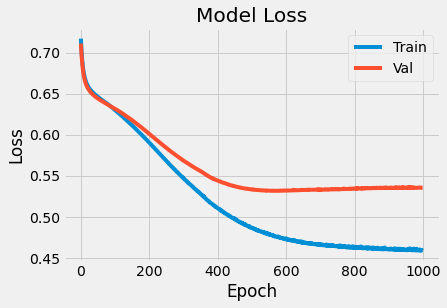

In [20]:
# visulise the training and validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

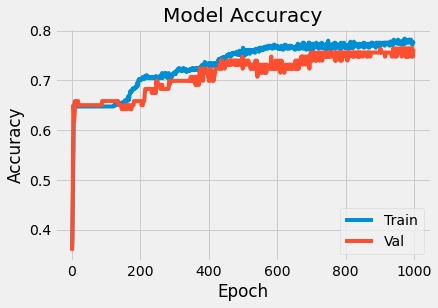

In [24]:
# visulise the training and validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [28]:
# Make a prediction and predict the actual values
prediction = model.predict(x_test)
prediction = [1 if y>= 0.5 else 0 for y in prediction] 
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [32]:
# Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(x_train)
pred = [1 if y>= 0.5 else 0 for y in pred] 
print(classification_report(y_train, pred))
print('confusion_matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy:', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84       398
         1.0       0.72      0.60      0.65       216

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.74       614
weighted avg       0.77      0.78      0.77       614

confusion_matrix: 
 [[348  50]
 [ 87 129]]

Accuracy: 0.7768729641693811


In [33]:
# Evaluate the model on the test data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(x_test)
pred = [1 if y>= 0.5 else 0 for y in pred] 
print(classification_report(y_test, pred))
print('confusion_matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy:', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       102
         1.0       0.67      0.67      0.67        52

    accuracy                           0.78       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154

confusion_matrix: 
 [[85 17]
 [17 35]]

Accuracy: 0.7792207792207793
